<a href="https://colab.research.google.com/github/DrDAN6770/DataSciense-with-Python/blob/main/%E8%B3%87%E6%96%99%E7%A7%91%E5%AD%B8%E5%B7%A5%E5%85%B7%E7%AE%B1/%E6%95%99%E7%B7%B4%E5%B8%B6%E8%B7%91/Task%2009/%E8%B3%87%E6%96%99%E6%8E%A2%E5%8B%98%E8%88%87%E9%97%9C%E8%81%AF%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 資料探勘（Data Mining）

---
* 目的是從資料中找出有價值但不容易發掘的趨勢，也大量的使用機器學習中的演算法
* 所以可以把資料探勘視為是一種目的，而機器學習是實現這個目的的方法
* 透過人工智慧、機器學習、統計學和資料庫的交叉方法從相對較大型的資料集中發現模式的計算過程

---

資料探勘過程的總體目標是從一個資料集中提取資訊，並將其轉換成可理解的結構，以進一步使用。

因為源自於資料庫領域，也有人會用「資料庫知識發現（**KDD**，Knowledge-Discovery in Databases） 」這個字描述資料探勘

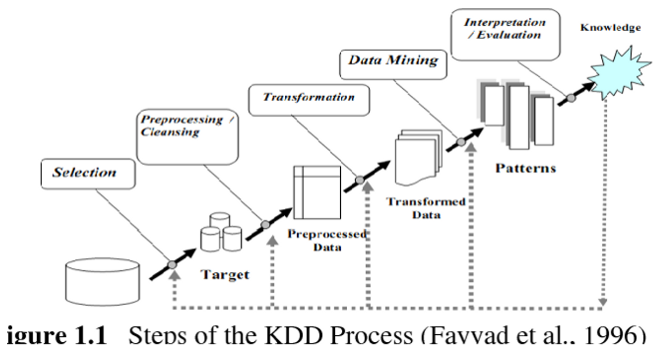

**簡單來說，資料探勘的核心的目的有以下兩種：**

1. 從資料中提取出隱含的過去未知的有價值的潛在資訊
2. 一門從大量資料或者資料庫中提取有用資訊的科學



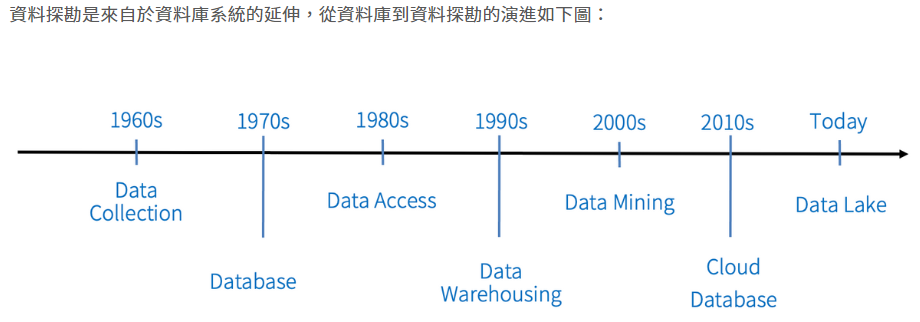

## 資料探勘包含以下常見算法

---

1. 分類分析（Classification）
2. 群集分析（Clustering）
3. 關聯分析（Association）
4. 順序型態分析（Sequential Pattern Analysis）
5. 時間序列分析（Time Series Forecasting）

* 其中**分類**與**群集**就是機器學習中的**監督式**與**非監督式模型**
* 順序型態分析和時間序列分析則是參考統計學當中的序列分析方法
* 關聯分析是在資料探勘領域中原生發展而來

# 使用 Python 實作資料探勘和關聯分析

---

Python 是一種廣泛使用的編程語言，有許多強大的套件可用於資料探勘和關聯分析。

關聯分析（又稱為購物籃分析）是數據探勘中的一個重要領域，其通過挖掘數據集中不同項目之間的關係，發現其中的規律性，並提供給商家和消費者進一步的思路和參考

---
[購物籃分析素材](https://www.inside.com.tw/article/7635-beer-diapers-myth)


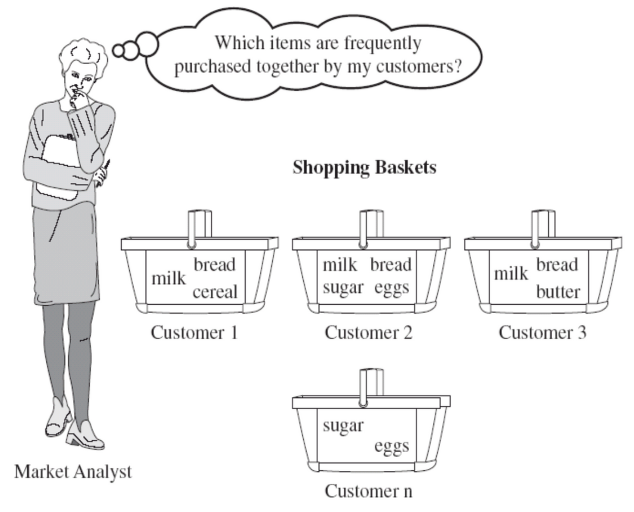

## 載入資料集

---

假設某零售商店希望透過關聯分析找出顧客的消費模式，進而提高銷售額。

首先，我們需要將該零售商店的交易紀錄匯入Python環境中，並使用Pandas套件將資料進行清理。

假設該資料集的欄位有「顧客 ID」、「購買日期」、「商品名稱」等欄位

我們可以使用以下程式碼來讀取該資料集：

In [ ]:
import pandas as pd

data = {
    '顧客 ID': ['A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D', 'E', 'E', 'E', 'F', 'F', 'G', 'G'],
    '商品名稱': ['可樂', '洋芋片', '啤酒', '花生', '餅乾', '可樂', '洋芋片', '花生', '餅乾', '可樂', '啤酒', '花生', '餅乾', '可樂', '啤酒', '餅乾', '可樂', '花生', '啤酒', '餅乾'],
    '購買日期': ['2022/01/01', '2022/01/01', '2022/01/02', '2022/01/02', '2022/01/02', '2022/01/03', '2022/01/03', '2022/01/03', '2022/01/03', '2022/01/04', '2022/01/04', '2022/01/04', '2022/01/04', '2022/01/05', '2022/01/05', '2022/01/05', '2022/01/06', '2022/01/06', '2022/01/07', '2022/01/07']
}

df = pd.DataFrame(data)

In [ ]:
df

,顧客 ID,商品名稱,購買日期
0,A,可樂,2022/01/01
1,A,洋芋片,2022/01/01
2,B,啤酒,2022/01/02
3,B,花生,2022/01/02
4,B,餅乾,2022/01/02
5,C,可樂,2022/01/03
6,C,洋芋片,2022/01/03
7,C,花生,2022/01/03
8,C,餅乾,2022/01/03
9,D,可樂,2022/01/04


In [ ]:
# 將資料集按照顧客 ID 及商品名稱進行分組
grouped = df.groupby(['顧客 ID', '商品名稱'])['購買日期'].count().reset_index()
grouped

,顧客 ID,商品名稱,購買日期
0,A,可樂,1
1,A,洋芋片,1
2,B,啤酒,1
3,B,花生,1
4,B,餅乾,1
5,C,可樂,1
6,C,洋芋片,1
7,C,花生,1
8,C,餅乾,1
9,D,可樂,1


##關聯分析

---

接著，我們可以使用 Apriori 演算法進行關聯分析，並找出顧客購買商品的模式。

假設我們希望找出支持度(support)大於0.2，信賴度(confidence)大於0.5的商品組合

我們可以使用以下程式碼進行分析

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# 將資料集轉換成 one-hot 編碼
hot_encoded = grouped.pivot(index='顧客 ID', columns='商品名稱', values='購買日期').fillna(0)

# 進行 Apriori 演算法分析
frequent_itemsets = apriori(hot_encoded, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

# 按照信賴度排序並輸出結果
rules.sort_values('confidence', ascending=False, inplace=True)
print(rules[['antecedents', 'consequents', 'support', 'confidence']])

In [ ]:
hot_encoded

商品名稱,可樂,啤酒,洋芋片,花生,餅乾
顧客 ID,,,,,
A,1.0,0.0,1.0,0.0,0.0
B,0.0,1.0,0.0,1.0,1.0
C,1.0,0.0,1.0,1.0,1.0
D,1.0,1.0,0.0,1.0,1.0
E,1.0,1.0,0.0,0.0,1.0
F,1.0,0.0,0.0,1.0,0.0
G,0.0,1.0,0.0,0.0,1.0


In [ ]:
frequent_itemsets

,support,itemsets
0,0.714286,(可樂)
1,0.571429,(啤酒)
2,0.285714,(洋芋片)
3,0.571429,(花生)
4,0.714286,(餅乾)
5,0.285714,"(可樂, 啤酒)"
6,0.285714,"(洋芋片, 可樂)"
7,0.428571,"(花生, 可樂)"
8,0.428571,"(可樂, 餅乾)"
9,0.285714,"(花生, 啤酒)"


In [ ]:
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
# rules

,antecedents,consequents,support,confidence,lift
12,"(可樂, 啤酒)",(餅乾),0.285714,1.000000,1.400000
1,(洋芋片),(可樂),0.285714,1.000000,1.400000
21,"(花生, 啤酒)",(餅乾),0.285714,1.000000,1.400000
9,(啤酒),(餅乾),0.571429,1.000000,1.400000
8,(餅乾),(啤酒),0.571429,0.800000,1.400000
10,(花生),(餅乾),0.428571,0.750000,1.050000
2,(花生),(可樂),0.428571,0.750000,1.050000
13,"(可樂, 餅乾)",(啤酒),0.285714,0.666667,1.166667
20,"(花生, 餅乾)",(啤酒),0.285714,0.666667,1.166667
16,"(花生, 可樂)",(餅乾),0.285714,0.666667,0.933333


從結果來看，表示出現「啤酒」的時候也很可能會出現「餅乾」（support 值 = 0.57、confidence = 1）

## Support 與 Confidence 值

---

在關聯分析中，support 和 confidence 是兩個重要的指標，用於評估兩個商品（或商品組合）之間的關係。

它們是關聯規則的度量標準。

---

* Support（支持度）:

      指資料集中包含該商品（或商品組合）的交易次數與總交易次數之比
      該商品（或商品組合）在所有交易中的出現頻率
      例如，如果一個商品組合在所有交易中出現了10次，而總交易次數為100次
      則該商品組合的支持度為0.1，即10/100
* Confidence（置信度）:

      指包含前提的交易也包含結論的交易所佔的比例。
      
      簡單來說，就是購買了前提商品（或商品組合）的交易中，也購買了結論商品（或商品組合）的交易占比。
      
      例如，在所有購買了商品A的交易中，有60%的交易也購買了商品B，則商品A和商品B的置信度為0.6


---

* 支持度衡量了一個商品組合的普遍程度
* 置信度衡量了前提和結論之間的關聯程度

根據支持度和置信度，可以生成關聯規則，並按照支持度、置信度等指標進行排序和篩選。

通常，支持度和置信度的值越高，說明關聯關係越強，規則越可信。

## antecedents 與 consequents & lift

---

在關聯式分析中antecedents與consequents是重要的概念

通常表示 如果A發生，B也會發生

* A : antecedents 前導事件
* B : consequents 後繼事件
* A、B通常都是frozenset，表唯一的元素、且無序

---

lift : 表示同時包含前導與後繼的交易比例與前導和後繼出現的獨立機率之比值

* lift = 1，表示antecedent和consequent之間沒有關聯性
* lift > 1, 表示antecedent和consequent的出現是正相關，提高A亦可提高B
* lift < 1, 與上述相反

```
Lift(A, B) = support(A ∪ B) / (support(A) * support(B))
```

In [ ]:
# Ex
S_AB = 0.285714
S_A = 0.285714
S_B = 0.714286
lift_AB = S_AB / (S_A * S_B)
lift_AB

1.399999440000224

# 延伸閱讀

---
* [Frequent itemsets via the Apriori algorithm](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/)
* [Association rules generation from frequent itemsets](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/)